# <b><p style="background-color: #ff6200; font-family:calibri; color:white; font-size:100%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Task 23-> Regression Models using scikit-learn</p>

## Regression Models
Regression models are foundational statistical tools widely used in data science and predictive modeling to understand and predict the relationship between a dependent variable (often called the target) and one or more independent variables (known as predictors or features). These models help in identifying trends, making predictions, and even suggesting relationships between variables in various fields, including finance, healthcare, and marketing.

### Why Use Regression Models?
- Prediction: Forecast future values based on past data (e.g., predicting sales, weather conditions).
- Insight: Understand relationships between variables (e.g., how does advertising spend influence sales?).
- Optimization: Aid in decision-making processes by modeling and analyzing key factors (e.g., optimizing marketing strategies).

### Key Concepts in Regression Analysis
- Dependent Variable (Y): The outcome or the variable you are trying to predict or explain.
- Independent Variables (X): The predictors or factors that influence the dependent variable.
- Coefficients (β): Values that multiply the independent variables in the regression equation, representing the relationship between each predictor and the dependent variable.
- Intercept (β₀): The expected mean value of Y when all Xs are zero.

## Implemented Models

1. [Linear Regression](#1)
2. [Ridge Regression](#2)
3. [Decision Tree Regression](#3)
4. [Support Vector Regression (SVR)](#4)
5. [Elastic Net Regression](#5)


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

### Generating sample data

In [2]:
# Generate synthetic data
np.random.seed(42) 
X = np.random.rand(100, 1) * 10 
y = 3 * X.flatten() + 5 + np.random.randn(100)  
data = pd.DataFrame({'independent_variable': X.flatten(), 'dependent_variable': y})

In [3]:
data.head()

,independent_variable,dependent_variable
0,3.745401,16.323251
1,9.507143,33.222422
2,7.319939,27.051579
3,5.986585,20.972186
4,1.560186,9.460887


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<a id=1></a>
# <b><span style='color:#ff6200'> Linear Regression</span>

Linear regression is a statistical method used to model the relationship between a dependent variable and one or more independent variables. The goal of linear regression is to find the best-fitting straight line (the regression line) that describes how the dependent variable changes as the independent variables change. Which is simply written as :
\begin{align}
        \mathbf{Y} = \mathbf{W} \cdot \mathbf{X} + \mathbf{B}
\end{align}
Where Y is the dependent variable, W is the scale factor or coefficient, B being the bias coefficient and X being the independent variable. The bias coefficient gives an extra degree of freedom to this model. The goal is to draw the line of best fit between X and Y which estimates the relationship between X and Y.


In [11]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

print(f"b = {lr_model.intercept_}")
print(f"m = {lr_model.coef_}")

b = 5.142913319458563
m = [2.95986473]


In [6]:
y_pred_lr = lr_model.predict(X_test)
y_pred_lr

array([ 7.02415451, 31.62859247, 28.00031389, 24.75267675, 12.80245073,
       18.17083175, 13.78999974, 30.68960722,  5.75218651, 16.2287942 ,
       17.92790159, 23.12541912, 29.27946854, 33.22864168,  8.68274123,
        9.76085403, 27.9714723 ,  7.33453485, 29.78208945, 10.19019672])

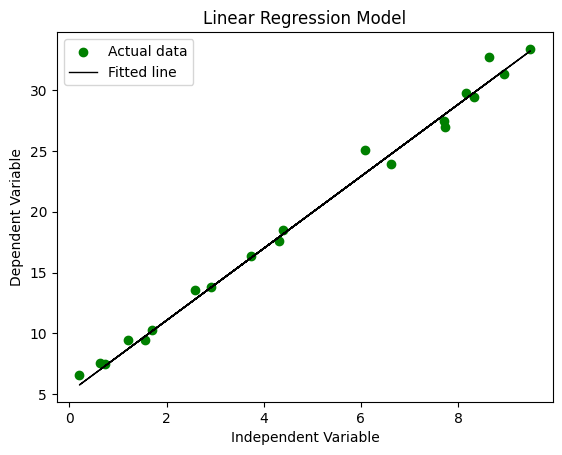

In [20]:
plt.scatter(X_test, y_test, color='green', label='Actual data')
plt.plot(X_test, y_pred_lr, color='black', linewidth=1, label='Fitted line')
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.title('Linear Regression Model')
plt.legend()
plt.show()

<a id=2></a>
# <b><span style='color:#ff6200'> Ridge Regression</span>

Ridge Regression, also known as Tikhonov regularization, is a type of linear regression that includes a regularization term in the cost function. This regularization term is the sum of the squares of the coefficients, multiplied by a regularization parameter (alpha). The goal of Ridge Regression is to prevent overfitting by penalizing large coefficients, making the model more robust to multicollinearity.

Mathematical Representation
The Ridge Regression model can be expressed as:
\begin{align}
\mathbf{Y} = \mathbf{W} \cdot \mathbf{X} + \mathbf{B}
\end{align}
with an additional regularization term:
\begin{align}
\text{Cost Function} = \sum_{i=1}^{n} (y_i - \hat{y_i})^2 + \alpha \sum_{j=1}^{p} \beta_j^2
\end{align}

Where:

𝑌
Y is the dependent variable.
𝑋
X is the independent variable.
𝑊
W (or 
𝛽
β) is the vector of coefficients.
𝐵
B is the bias coefficient.
𝛼
α is the regularization parameter.

### Advantages of Ridge Regression
- Reduces Overfitting: By adding a penalty on the size of the coefficients, Ridge Regression helps to reduce overfitting.
- Handles Multicollinearity: Ridge Regression can handle multicollinearity better than standard linear regression by shrinking coefficients.
- Model Complexity: Controls the complexity of the model, leading to more generalizable predictions.

In [12]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

print(f"b = {ridge_model.intercept_}")
print(f"m = {ridge_model.coef_}")

b = 5.163302357055024
m = [2.95550902]


In [13]:
y_pred_ridge = ridge_model.predict(X_test)
y_pred_ridge

array([ 7.04177513, 31.61000538, 27.98706615, 24.74420821, 12.81156805,
       18.172049  , 13.79766379, 30.67240193,  5.77167894, 16.23286934,
       17.92947633, 23.11934524, 29.2643384 , 33.20769997,  8.69792108,
        9.77444734, 27.958267  ,  7.35169872, 29.76621967, 10.20315821])

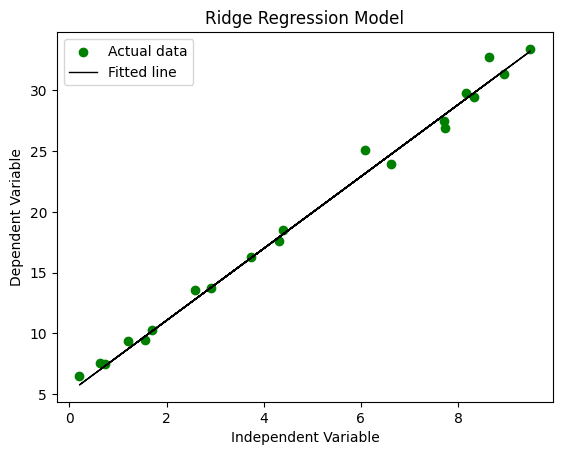

In [22]:
plt.scatter(X_test, y_test, color='green', label='Actual data')
plt.plot(X_test, y_pred_ridge, color='black', linewidth=1, label='Fitted line')
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.title('Ridge Regression Model')
plt.legend()
plt.show()

<a id=3></a>
# <b><span style='color:#ff6200'> Decision Tree Regression</span>

Decision Tree Regression uses a tree-like model of decisions and their possible consequences. It splits the data into subsets based on the value of input variables, creating a tree where each leaf represents a predicted value.

The main idea behind decision tree regression is to find the best-split points in the dataset to minimize the mean squared error (MSE). The best split point is chosen by finding the feature and threshold value that minimize the MSE while maximizing the information gain (Gini impurity or entropy).

### Advantages
- Non-parametric: No assumptions about the underlying data distribution.
- Captures Non-linear Relationships: Effectively captures non-linear relationships.
- Interpretability: Easy to understand and visualize.

In [29]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [30]:
y_pred_tree = tree_model.predict(X_test)
y_pred_tree

array([ 7.20909818, 32.57975841, 27.23950097, 25.33462983, 12.81840944,
       18.16738253, 12.27335926, 30.46701415,  6.0392646 , 15.75626817,
       18.16738253, 23.65170712, 29.22540657, 33.22242184,  8.62643528,
       10.03694818, 27.23950097,  7.4964021 , 30.67564249, 10.55182657])

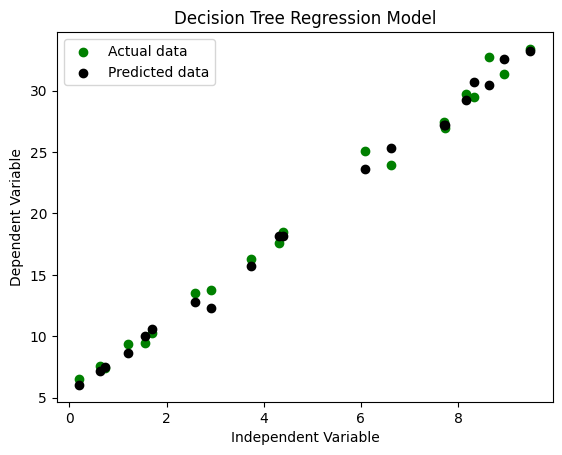

In [31]:
plt.scatter(X_test, y_test, color='green', label='Actual data')
plt.scatter(X_test, y_pred_tree, color='black', label='Predicted data')
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.title('Decision Tree Regression Model')
plt.legend()
plt.show()

<a id=4></a>
# <b><span style='color:#ff6200'> Support Vector Regression (SVR)</span>

Support Vector Regression (SVR) is a type of Support Vector Machine (SVM) that is used for regression problems. SVR tries to find a function that deviates from the actual observed values by a value no greater than a specified margin (epsilon). It aims to fit the best line within a threshold value, ensuring the model's complexity (measured by the norm of the weights) remains minimal.

The SVR model is represented by:

\begin{align}
\mathbf{Y} = \sum_{i=1}^{N} \alpha_i \cdot K(\mathbf{X_i}, \mathbf{X}) + \mathbf{B}
\end{align}

Where:

𝑌
Y is the dependent variable.
𝛼
𝑖
α 
i
​
  are the coefficients.
𝐾
(
𝑋
𝑖
,
𝑋
)
K(X 
i
​
 ,X) is the kernel function applied to the input features.
𝑋
𝑖
X 
i
​
  are the support vectors.
𝐵
B is the bias term.
The goal of SVR is to minimize the coefficients 
𝛼
𝑖
α 
i
​
  while ensuring the predictions remain within an acceptable margin of error from the actual values.

In [36]:
from sklearn.svm import SVR

svr_model = SVR(kernel='linear', C=1.0, epsilon=0.1)
svr_model.fit(X_train, y_train)

SVR(kernel='linear')

In [37]:
y_pred_svr = svr_model.predict(X_test)
y_pred_svr

array([ 7.10151457, 31.67060227, 28.04753659, 24.80456548, 12.87150886,
       18.23217689, 13.85763902, 30.7329661 ,  5.83137406, 16.29292956,
       17.98959576, 23.1796458 , 29.32485343, 33.26835262,  8.75771832,
        9.83428216, 28.01873644,  7.41144898, 29.82675221, 10.26300799])

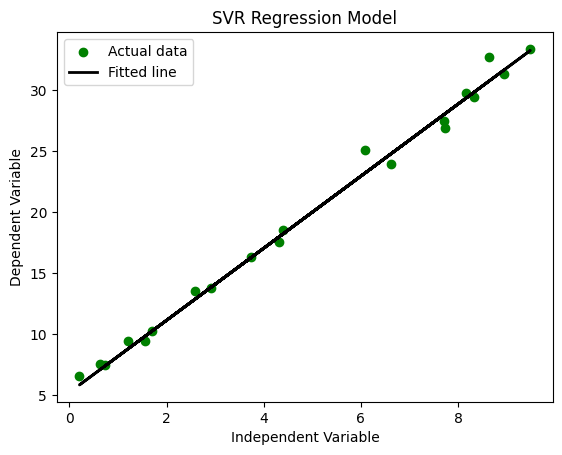

In [38]:
plt.scatter(X_test, y_test, color='green', label='Actual data')
plt.plot(X_test, y_pred_svr, color='black', linewidth=2, label='Fitted line')
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.title('SVR Regression Model')
plt.legend()
plt.show()

<a id=5></a>
# <b><span style='color:#ff6200'> Elastic Net Regression</span>

Elastic Net Regression is a regularized regression method that linearly combines the penalties of Lasso and Ridge methods. It is particularly useful when dealing with highly correlated independent variables. The goal of Elastic Net Regression is to find the best-fitting model that balances both L1 and L2 regularizations.

The Elastic Net regression can be written as:
\begin{align}
\mathbf{Y} = \mathbf{W} \cdot \mathbf{X} + \mathbf{B}
\end{align}

Where:

𝑌
Y is the dependent variable.
𝑊
W is the scale factor or coefficient.
𝑋
X is the independent variable.
𝐵
B is the bias coefficient, providing an extra degree of freedom to the model.
The Elastic Net penalty is a combination of the L1 and L2 penalties:
\begin{align}
\lambda \left( \alpha \sum_{i=1}^{n} \left| \mathbf{W}i \right| + \frac{1 - \alpha}{2} \sum{i=1}^{n} \mathbf{W}_i^2 \right)
\end{align}

Where:

𝜆
λ is the regularization strength.
𝛼
α controls the mix between Lasso (L1) and Ridge (L2) penalties.

In [39]:
from sklearn.linear_model import ElasticNet

elastic_net_model = ElasticNet(alpha=1.0, l1_ratio=0.5)
elastic_net_model.fit(X_train, y_train)

ElasticNet()

In [40]:
y_pred_elastic_net = elastic_net_model.predict(X_test)
y_pred_elastic_net

array([ 7.9159259 , 30.68790843, 27.32985178, 24.32408769, 13.26387413,
       18.23243626, 14.17787382, 29.81885562,  6.73868977, 16.43503511,
       18.00759872, 22.8180227 , 28.51373931, 32.16879138,  9.45098667,
       10.44880528, 27.30315821,  8.20319015, 28.97892672, 10.84617197])

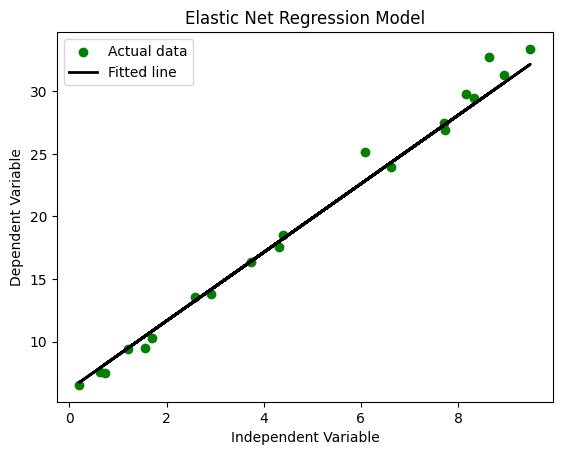

In [42]:
plt.scatter(X_test, y_test, color='green', label='Actual data')
plt.plot(X_test, y_pred_elastic_net, color='black', linewidth=2, label='Fitted line')
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.title('Elastic Net Regression Model')
plt.legend()
plt.show()